<h1>Intro to Computer Music, Lab09</h1>
<h2>Gus Xia, NYU Shanghai</h2>

In this lab you will:

1. Extract MIDI melody according to Metadata
2. Validate the melody via content-based approach

<h2> Load packages </h2>

In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
import os
import copy as cp
from pylab import *
import pretty_midi
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
from __future__ import print_function # use the print() function from Python3
def show_score(S, fs = 100):
    imshow(S, aspect='auto', origin='bottom', interpolation='nearest', cmap=cm.gray_r)
    xlabel('Time')
    ylabel('Pitch')
    pc=array(['C','C#','D','Eb','E','F','F#','G','Ab','A','Bb','B'])
    idx = tile([0,4,7],13)[:128]
    #yticks(arange(0,128,4),pc[idx], fontsize=5)
    #xticks(arange(0,S.shape[1],fs),arange(0,S.shape[1],fs)/fs, )     
def matrix2notes(m):
    # first sort the matrix to make sure starting time is in order
    m = array(m)
    m = m[argsort(m[:,0]),:]
    # transfer the databack to note list
    notes=[pretty_midi.Note(start=m[i,0], end=m[i,1], pitch=int(m[i,2]), velocity= int(m[i,3]) ) 
                            for i in range(size(m,0))]
    return notes

<h2> Inspect data </h2>

[   0.      1.04    2.82    4.6     6.37    8.15    9.93   11.71   13.49
   15.26   17.04   18.82   20.6    22.38   24.15   25.93   27.71   29.49
   31.26   33.04   34.82   36.6    38.37   40.15   41.93   43.71   45.49
   47.27   49.04   50.82   52.6    54.37   56.15   57.93   59.71   61.48
   63.26   65.04   66.82   68.6    70.37   72.15   73.93   75.71   77.48
   79.26   81.04   82.82   84.6    86.37   88.15   89.93   91.71   93.48
   95.26   97.04   98.82  100.6   102.37  104.15  105.93  107.71  109.48
  111.26  113.04  114.82  116.6   118.37  120.15  121.93  123.71  125.48
  127.26  129.04  130.82  132.6   134.37  136.15  137.93  139.71  141.48
  143.26  145.04  146.82  148.6   150.37  152.15  153.93  155.71  157.48
  159.26  161.04  162.82  164.6   166.37  168.15  169.93  171.71  173.48
  175.26  177.04  178.82  180.6   182.37  184.15  185.93  187.71  189.48
  191.26  193.04  194.82  196.59  198.37  200.15  201.93  203.71]


[Instrument(program=0, is_drum=False, name="A.P/KIRA"),
 Instrument(program=97, is_drum=False, name="A.P/KIRA"),
 Instrument(program=39, is_drum=False, name="BASS"),
 Instrument(program=55, is_drum=False, name="O.HIT"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=79, is_drum=False, name="SQ-R"),
 Instrument(program=80, is_drum=False, name="SQ-R"),
 Instrument(program=80, is_drum=False, name="SYN./E.P"),
 Instrument(program=4, is_drum=False, name="SYN./E.P"),
 Instrument(program=108, is_drum=False, name="SQ-L"),
 Instrument(program=48, is_drum=False, name="ST-1"),
 Instrument(program=18, is_drum=False, name="ORGAN"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=25, is_drum=False, name="A.G/E.G-SOLO"),
 Instrument(program=29, is_drum=False, name="A.G/E.G-SOLO"),
 Instrument(program=25, is_drum=False, name="A.G/C.G"),
 Instrument(program=27, is_drum=False, name="A.G/C.G"),
 Instrument(program=30, is_drum=False, name="A.G/C.G"),
 In

'after selection by Metadata:'

[Instrument(program=73, is_drum=False, name="MELODY")]

'notes are:'

[Note(start=11.260000, end=11.468125, pitch=75, velocity=100),
 Note(start=11.486875, end=11.695937, pitch=78, velocity=100),
 Note(start=11.714583, end=11.913500, pitch=80, velocity=100),
 Note(start=11.931833, end=12.130750, pitch=83, velocity=100),
 Note(start=12.149083, end=12.357187, pitch=82, velocity=100),
 Note(start=12.375937, end=12.470625, pitch=78, velocity=100),
 Note(start=12.489375, end=12.693500, pitch=80, velocity=100),
 Note(start=13.038167, end=13.246250, pitch=75, velocity=100),
 Note(start=13.265000, end=13.473125, pitch=78, velocity=100),
 Note(start=13.491833, end=13.691667, pitch=80, velocity=100),
 Note(start=13.709083, end=13.908917, pitch=83, velocity=100),
 Note(start=13.926333, end=14.135312, pitch=82, velocity=100),
 Note(start=14.154062, end=14.248750, pitch=78, velocity=100),
 Note(start=14.267500, end=14.471667, pitch=80, velocity=100),
 Note(start=14.815417, end=15.018917, pitch=87, velocity=100),
 Note(start=15.038167, end=15.241667, pitch=87, velocit

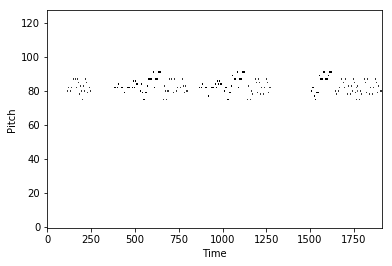

In [2]:
# get downbeat from the whole music
midi_data = pretty_midi.PrettyMIDI('./melody-chord-MIDI-RWC100/AIST.RWC-MDB-P-2001.SMF_SYNC/RM-P001.SMF_SYNC.MID')
print(midi_data.get_downbeats())
display(midi_data.instruments)
midi_data.instruments = [midi_data.instruments[4]]
display("after selection by Metadata:", midi_data.instruments)
show_score(midi_data.get_piano_roll(fs = 10), fs = 10)
display("notes are:", midi_data.instruments[0].notes)

<h2> Extract Melody </h2>

In [4]:
path = './melody-chord-MIDI-RWC100/AIST.RWC-MDB-P-2001.SMF_SYNC/'
for ix, filename in enumerate(os.listdir(path)):
    print(ix, filename)
    if filename.endswith(".MID"): 
        midi_data = pretty_midi.PrettyMIDI(path + filename)
        display("the instruments are",midi_data.instruments)

0 RM-P097.SMF_SYNC.MID


'the instruments are'

[Instrument(program=12, is_drum=False, name="MARIMBA/PIANO"),
 Instrument(program=1, is_drum=False, name="MARIMBA/PIANO"),
 Instrument(program=39, is_drum=False, name="BASS"),
 Instrument(program=5, is_drum=False, name="E.PIANO"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=24, is_drum=False, name="AC.GT"),
 Instrument(program=28, is_drum=False, name="MUTE GT"),
 Instrument(program=29, is_drum=False, name="E.GT(R)"),
 Instrument(program=25, is_drum=False, name="F.GT"),
 Instrument(program=27, is_drum=False, name="CUTTING GT"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=89, is_drum=False, name="PAD"),
 Instrument(program=48, is_drum=False, name="PAD STR"),
 Instrument(program=48, is_drum=False, name="STR/BRASS2"),
 Instrument(program=61, is_drum=False, name="STR/BRASS2"),
 Instrument(program=78, is_drum=False, name="FUE/KIRA/BRASS"),
 Instrument(program=98, is_drum=False, name="FUE/KIRA/BRASS"),
 Instrument(program=61, is_drum=

1 RM-P068.SMF_SYNC.MID


'the instruments are'

[Instrument(program=0, is_drum=False, name="PIANO"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=28, is_drum=False, name="E.GT 1"),
 Instrument(program=73, is_drum=False, name="MELO"),
 Instrument(program=88, is_drum=False, name="SYN"),
 Instrument(program=61, is_drum=False, name="BRASS"),
 Instrument(program=48, is_drum=False, name="STRINGS 1"),
 Instrument(program=48, is_drum=False, name="STRINGS 2"),
 Instrument(program=25, is_drum=False, name="A.GT"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=27, is_drum=False, name="E.GT 2"),
 Instrument(program=25, is_drum=False, name="A.GT CUT 1"),
 Instrument(program=25, is_drum=False, name="A.GT CUT 2"),
 Instrument(program=53, is_drum=False, name="CHORUS")]

2 RM-P090.SMF_SYNC.MID


'the instruments are'

[Instrument(program=3, is_drum=False, name="Piano"),
 Instrument(program=33, is_drum=False, name="Bass"),
 Instrument(program=50, is_drum=False, name="Pad"),
 Instrument(program=73, is_drum=False, name="Melody"),
 Instrument(program=54, is_drum=False, name="Chorus"),
 Instrument(program=62, is_drum=False, name="Brass"),
 Instrument(program=38, is_drum=False, name="Arrpegio"),
 Instrument(program=88, is_drum=False, name="Fantasy"),
 Instrument(program=29, is_drum=False, name="Lead Gt"),
 Instrument(program=0, is_drum=True, name="Drums"),
 Instrument(program=25, is_drum=False, name="Ac.Gt.L."),
 Instrument(program=30, is_drum=False, name="Dist.R."),
 Instrument(program=80, is_drum=False, name="PortaSyn")]

3 RM-P085.SMF_SYNC.MID


'the instruments are'

[Instrument(program=2, is_drum=False, name="E.PIANO"),
 Instrument(program=39, is_drum=False, name="BASS "),
 Instrument(program=27, is_drum=False, name="GT 1"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=7, is_drum=False, name="GT 2"),
 Instrument(program=28, is_drum=False, name="M GT"),
 Instrument(program=49, is_drum=False, name="SYN STR"),
 Instrument(program=61, is_drum=False, name="BRASS 1"),
 Instrument(program=62, is_drum=False, name="BRASS 2"),
 Instrument(program=16, is_drum=True, name="DRUMS "),
 Instrument(program=25, is_drum=False, name="SUBDRUMS    "),
 Instrument(program=10, is_drum=False, name="BELL"),
 Instrument(program=9, is_drum=False, name="GLOCKEN"),
 Instrument(program=100, is_drum=False, name="BRIGHTNESS"),
 Instrument(program=87, is_drum=False, name="SYNTH"),
 Instrument(program=53, is_drum=False, name="CHORUS")]

4 RM-P082.SMF_SYNC.MID


'the instruments are'

[Instrument(program=90, is_drum=False, name="Pad"),
 Instrument(program=33, is_drum=False, name="Bass"),
 Instrument(program=4, is_drum=False, name="E.P."),
 Instrument(program=73, is_drum=False, name="Melo"),
 Instrument(program=88, is_drum=False, name="Fantasy"),
 Instrument(program=30, is_drum=False, name="Lead Gt.1"),
 Instrument(program=30, is_drum=False, name="Lead Gt.2"),
 Instrument(program=30, is_drum=False, name="Chord.L"),
 Instrument(program=30, is_drum=False, name="Chord.R"),
 Instrument(program=0, is_drum=True, name="Drums"),
 Instrument(program=0, is_drum=False, name="Shaker"),
 Instrument(program=27, is_drum=False, name="Clean Gt."),
 Instrument(program=26, is_drum=False, name="Clean Lead"),
 Instrument(program=120, is_drum=False, name="Pick Scrape")]

5 RM-P028.SMF_SYNC.MID


'the instruments are'

[Instrument(program=80, is_drum=False, name="SYN.LEAD"),
 Instrument(program=81, is_drum=False, name="SYN.LEAD"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=93, is_drum=False, name="SYNTH 1"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=0, is_drum=False, name="A.PIANO"),
 Instrument(program=48, is_drum=False, name="STRINGS 1"),
 Instrument(program=48, is_drum=False, name="STRINGS 2"),
 Instrument(program=62, is_drum=False, name="SYNTH 2"),
 Instrument(program=4, is_drum=False, name="E.PIANO"),
 Instrument(program=25, is_drum=True, name="DRUMS 1"),
 Instrument(program=1, is_drum=False, name="DRUMS 2"),
 Instrument(program=28, is_drum=False, name="E.GUITAR 1"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 2"),
 Instrument(program=127, is_drum=False, name="E.GUITAR 3"),
 Instrument(program=28, is_drum=False, name="E.GUITAR 3"),
 Instrument(program=54, is_drum=False, name="CHORUS"),
 Instrument(program=80, is_drum=False,

6 RM-P019.SMF_SYNC.MID


'the instruments are'

[Instrument(program=2, is_drum=False, name="A.PIANO"),
 Instrument(program=39, is_drum=False, name="BASS"),
 Instrument(program=54, is_drum=False, name="E.GUITAR 1/CHORUS"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 1/CHORUS"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=87, is_drum=False, name="SYNTH 1"),
 Instrument(program=87, is_drum=False, name="SYNTH 2"),
 Instrument(program=98, is_drum=False, name="KIRA"),
 Instrument(program=119, is_drum=False, name="REVERSE.CYM"),
 Instrument(program=61, is_drum=False, name="BRASS"),
 Instrument(program=25, is_drum=True, name="DRUMS 1"),
 Instrument(program=24, is_drum=False, name="DRUMS 2"),
 Instrument(program=48, is_drum=False, name="STRINGS/E.GUITAR "),
 Instrument(program=30, is_drum=False, name="STRINGS/E.GUITAR "),
 Instrument(program=31, is_drum=False, name="STRINGS/E.GUITAR "),
 Instrument(program=50, is_drum=False, name="PAD 1/PAD 2"),
 Instrument(program=89, is_drum=False, name="PAD 1/PAD 2

7 RM-P059.SMF_SYNC.MID


'the instruments are'

[Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=0, is_drum=False, name="A.PIANO"),
 Instrument(program=11, is_drum=False, name="MELODY"),
 Instrument(program=18, is_drum=False, name="ORGAN"),
 Instrument(program=54, is_drum=False, name="PAD SYNTH"),
 Instrument(program=59, is_drum=False, name="MUTED TRUMPET"),
 Instrument(program=26, is_drum=False, name="E.GUITAR"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=0, is_drum=False, name="SAMPLE DRUMS")]

8 RM-P029.SMF_SYNC.MID


'the instruments are'

[Instrument(program=1, is_drum=False, name="PIANO"),
 Instrument(program=39, is_drum=False, name="BASS"),
 Instrument(program=5, is_drum=False, name="E.PIANO"),
 Instrument(program=73, is_drum=False, name="MELO"),
 Instrument(program=64, is_drum=False, name="S.SAX"),
 Instrument(program=17, is_drum=False, name="ORGAN"),
 Instrument(program=46, is_drum=False, name="HARP"),
 Instrument(program=119, is_drum=False, name="REVERSE"),
 Instrument(program=126, is_drum=False, name="S.E"),
 Instrument(program=0, is_drum=True, name="DRUM"),
 Instrument(program=27, is_drum=False, name="Clean Wah<L>"),
 Instrument(program=28, is_drum=False, name="Clean <R>"),
 Instrument(program=27, is_drum=False, name="Clean <R>"),
 Instrument(program=27, is_drum=False, name="Guitar <R>"),
 Instrument(program=26, is_drum=False, name="Guitar <L>"),
 Instrument(program=52, is_drum=False, name="CHO")]

9 RM-P083.SMF_SYNC.MID


'the instruments are'

[Instrument(program=1, is_drum=False, name="PIANO"),
 Instrument(program=36, is_drum=False, name="BASS"),
 Instrument(program=29, is_drum=False, name="OD GT"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=30, is_drum=False, name="DIST GT"),
 Instrument(program=61, is_drum=False, name="BRASS 1"),
 Instrument(program=62, is_drum=False, name="BRASS 2"),
 Instrument(program=18, is_drum=False, name="ORGAN1"),
 Instrument(program=17, is_drum=False, name="ORGAN2"),
 Instrument(program=8, is_drum=True, name="DRUMS"),
 Instrument(program=28, is_drum=False, name="M.DIST GT")]

10 RM-P084.SMF_SYNC.MID


'the instruments are'

[Instrument(program=3, is_drum=False, name="Piano"),
 Instrument(program=33, is_drum=False, name="Bass"),
 Instrument(program=88, is_drum=False, name="Fantasy"),
 Instrument(program=73, is_drum=False, name="Melo"),
 Instrument(program=54, is_drum=False, name="Chorus"),
 Instrument(program=30, is_drum=False, name="Dist.Gt.L"),
 Instrument(program=30, is_drum=False, name="Dist.Gt.R"),
 Instrument(program=29, is_drum=False, name="OD.Guitar U"),
 Instrument(program=29, is_drum=False, name="OD.Guitar.L"),
 Instrument(program=0, is_drum=True, name="Drums"),
 Instrument(program=48, is_drum=False, name="Strings"),
 Instrument(program=98, is_drum=False, name="SynBell")]

11 RM-P091.SMF_SYNC.MID


'the instruments are'

[Instrument(program=1, is_drum=False, name="PIANO"),
 Instrument(program=39, is_drum=False, name="BASS"),
 Instrument(program=81, is_drum=False, name="SYNTH SOLO"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=50, is_drum=False, name="SYN.STR"),
 Instrument(program=61, is_drum=False, name="BRASS"),
 Instrument(program=81, is_drum=False, name="SYNTH"),
 Instrument(program=89, is_drum=False, name="PAD"),
 Instrument(program=55, is_drum=False, name="HIT"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=0, is_drum=False, name="BD&SD"),
 Instrument(program=16, is_drum=False, name="KIRA"),
 Instrument(program=30, is_drum=False, name="WOW"),
 Instrument(program=90, is_drum=False, name="SYNTH(SEQ)"),
 Instrument(program=122, is_drum=False, name="SE")]

12 RM-P069.SMF_SYNC.MID


'the instruments are'

[Instrument(program=29, is_drum=False, name="OD GT"),
 Instrument(program=39, is_drum=False, name="BASS"),
 Instrument(program=87, is_drum=False, name="SYNTH SOLO"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=49, is_drum=False, name="STRINGS1"),
 Instrument(program=48, is_drum=False, name="STRINGS2"),
 Instrument(program=26, is_drum=False, name="JAZZ GT"),
 Instrument(program=99, is_drum=False, name="SYNTH"),
 Instrument(program=7, is_drum=False, name="WOW GT"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=89, is_drum=False, name="PAD"),
 Instrument(program=124, is_drum=False, name="WINDBELL"),
 Instrument(program=4, is_drum=False, name="E.PIANO"),
 Instrument(program=98, is_drum=False, name="KIRA"),
 Instrument(program=118, is_drum=False, name="808")]

13 RM-P096.SMF_SYNC.MID


'the instruments are'

[Instrument(program=122, is_drum=False, name="BURST SE"),
 Instrument(program=38, is_drum=False, name="BASS"),
 Instrument(program=2, is_drum=False, name="A.PIANO"),
 Instrument(program=11, is_drum=False, name="MELODY"),
 Instrument(program=52, is_drum=False, name="CHORUS"),
 Instrument(program=50, is_drum=False, name="PAD SYNTH"),
 Instrument(program=88, is_drum=False, name="ARPEGGIO L"),
 Instrument(program=98, is_drum=False, name="ARPEGGIO R"),
 Instrument(program=1, is_drum=False, name="ARPEGGIO C1"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=1, is_drum=False, name="LOOP DRUMS"),
 Instrument(program=98, is_drum=False, name="ARPEGGIO C2"),
 Instrument(program=0, is_drum=False, name="A.PIANO 2"),
 Instrument(program=124, is_drum=False, name="WIND CHAIM"),
 Instrument(program=119, is_drum=False, name="REVERSE"),
 Instrument(program=0, is_drum=False, name="A.PIANO 3")]

14 Icon
15 RM-P058.SMF_SYNC.MID


'the instruments are'

[Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=5, is_drum=False, name="E.PIANO"),
 Instrument(program=11, is_drum=False, name="MELODY"),
 Instrument(program=0, is_drum=False, name="A.PIANO"),
 Instrument(program=73, is_drum=False, name="FLUTE"),
 Instrument(program=66, is_drum=False, name="T.SAX"),
 Instrument(program=87, is_drum=False, name="SYNTH 1 "),
 Instrument(program=54, is_drum=False, name="SYNTH VOICE "),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=0, is_drum=False, name="SAMPLE DRUMS"),
 Instrument(program=61, is_drum=False, name="BRASS "),
 Instrument(program=82, is_drum=False, name="ANALOG SYNTH ")]

16 RM-P018.SMF_SYNC.MID


'the instruments are'

[Instrument(program=2, is_drum=False, name="E.PIANO"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=89, is_drum=False, name="PAD"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=54, is_drum=False, name="CHORUS"),
 Instrument(program=50, is_drum=False, name="SYN.STRINGS"),
 Instrument(program=98, is_drum=False, name="BELL 1"),
 Instrument(program=82, is_drum=False, name="BELL 2"),
 Instrument(program=61, is_drum=False, name="SYN.BRASS"),
 Instrument(program=0, is_drum=True, name="DRUMS 1"),
 Instrument(program=0, is_drum=False, name="DRUMS 2"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 1"),
 Instrument(program=29, is_drum=False, name="E.GUITAR 2"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 3"),
 Instrument(program=27, is_drum=False, name="E.GUITAR 4"),
 Instrument(program=26, is_drum=False, name="E.GUITAR 5")]

17 RM-P040.SMF_SYNC.MID


'the instruments are'

[Instrument(program=1, is_drum=False, name="PIANO"),
 Instrument(program=34, is_drum=False, name="BASS"),
 Instrument(program=29, is_drum=False, name="LEAD E.GT"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=48, is_drum=False, name="STRINGS"),
 Instrument(program=48, is_drum=False, name="STRINGS/L"),
 Instrument(program=30, is_drum=False, name="DIST GT"),
 Instrument(program=27, is_drum=False, name="Chorus Gt"),
 Instrument(program=100, is_drum=False, name="KIRA"),
 Instrument(program=8, is_drum=True, name="Drums"),
 Instrument(program=25, is_drum=False, name="F.GT"),
 Instrument(program=30, is_drum=False, name="D.GTR"),
 Instrument(program=53, is_drum=False, name="CHORUS")]

18 RM-P015.SMF_SYNC.MID


'the instruments are'

[Instrument(program=28, is_drum=False, name="SEQ.1"),
 Instrument(program=36, is_drum=False, name="SEQ.2"),
 Instrument(program=73, is_drum=False, name="MELO"),
 Instrument(program=55, is_drum=False, name="HIT"),
 Instrument(program=48, is_drum=False, name="STRINGS"),
 Instrument(program=31, is_drum=False, name="E.G HARM"),
 Instrument(program=88, is_drum=False, name="SYNTH"),
 Instrument(program=39, is_drum=False, name="LOW SYNTH"),
 Instrument(program=122, is_drum=False, name="SYNTH"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=30, is_drum=False, name="Guitar<L>"),
 Instrument(program=30, is_drum=False, name="Guitar<R>"),
 Instrument(program=30, is_drum=False, name="Guitar<C>"),
 Instrument(program=30, is_drum=False, name="E.G DELAY"),
 Instrument(program=29, is_drum=False, name="E.G DELAY")]

19 RM-P047.SMF_SYNC.MID


'the instruments are'

[Instrument(program=2, is_drum=False, name="PIANO"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=30, is_drum=False, name="GT1"),
 Instrument(program=22, is_drum=False, name="MELODY"),
 Instrument(program=16, is_drum=False, name="ORGAN"),
 Instrument(program=25, is_drum=False, name="GT2"),
 Instrument(program=73, is_drum=False, name="FLUTE"),
 Instrument(program=30, is_drum=False, name="GT3"),
 Instrument(program=11, is_drum=False, name="CHORUS"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=29, is_drum=False, name="GT4")]

20 RM-P012.SMF_SYNC.MID


'the instruments are'

[Instrument(program=4, is_drum=False, name="E.P"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=104, is_drum=False, name="SITAR"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=29, is_drum=False, name="O.D GT 1"),
 Instrument(program=29, is_drum=False, name="O.D GT 2"),
 Instrument(program=25, is_drum=False, name="A.GT 1"),
 Instrument(program=25, is_drum=False, name="A.GT 2"),
 Instrument(program=27, is_drum=False, name="C.GT 1"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=27, is_drum=False, name="C.GT 2"),
 Instrument(program=71, is_drum=False, name="CHO")]

21 RM-P052.SMF_SYNC.MID


'the instruments are'

[Instrument(program=1, is_drum=False, name="A.PIANO"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=18, is_drum=False, name="ORGAN"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=14, is_drum=False, name="BELL"),
 Instrument(program=6, is_drum=False, name="HARPSICHORD"),
 Instrument(program=45, is_drum=False, name="PIZZ"),
 Instrument(program=48, is_drum=False, name="STRINGS"),
 Instrument(program=4, is_drum=False, name="E.PIANO"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=98, is_drum=False, name="BELL 2"),
 Instrument(program=26, is_drum=False, name="E.GUITAR 1"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 2"),
 Instrument(program=31, is_drum=False, name="E.GUITAR 2"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 3"),
 Instrument(program=29, is_drum=False, name="E.GUITAR 3"),
 Instrument(program=27, is_drum=False, name="E.GUITAR 4"),
 Instrument(program=27, is_drum=False, name="E

22 RM-P007.SMF_SYNC.MID


'the instruments are'

[Instrument(program=2, is_drum=False, name="PIANO"),
 Instrument(program=39, is_drum=False, name="BASS"),
 Instrument(program=98, is_drum=False, name="BELL"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=89, is_drum=False, name="PAD"),
 Instrument(program=81, is_drum=False, name="SYN.BRASS"),
 Instrument(program=81, is_drum=False, name="SEQ"),
 Instrument(program=94, is_drum=False, name="STNTH"),
 Instrument(program=48, is_drum=False, name="STRINGS"),
 Instrument(program=8, is_drum=True, name="DRUMS"),
 Instrument(program=25, is_drum=False, name="PERC"),
 Instrument(program=80, is_drum=False, name="SYNTH.FILL"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 1"),
 Instrument(program=30, is_drum=False, name="E.GUITAR 2"),
 Instrument(program=28, is_drum=False, name="E.GUITAR 2"),
 Instrument(program=31, is_drum=False, name="E.GUITAR 2(SUB)")]

23 RM-P055.SMF_SYNC.MID


'the instruments are'

[Instrument(program=2, is_drum=False, name="pf"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=29, is_drum=False, name="gt/solo"),
 Instrument(program=22, is_drum=False, name="MELODY"),
 Instrument(program=48, is_drum=False, name="st1"),
 Instrument(program=48, is_drum=False, name="st2"),
 Instrument(program=48, is_drum=False, name="st"),
 Instrument(program=48, is_drum=False, name="st"),
 Instrument(program=74, is_drum=False, name="flute"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=27, is_drum=False, name="gt/c"),
 Instrument(program=24, is_drum=False, name="gt/r"),
 Instrument(program=30, is_drum=False, name="gt/l"),
 Instrument(program=25, is_drum=False, name="gt/l")]

24 RM-P063.SMF_SYNC.MID


'the instruments are'

[Instrument(program=99, is_drum=False, name="E.PIANO"),
 Instrument(program=34, is_drum=False, name="BASS"),
 Instrument(program=30, is_drum=False, name="D.GT"),
 Instrument(program=73, is_drum=False, name="VOCAL"),
 Instrument(program=28, is_drum=False, name="M.GT"),
 Instrument(program=48, is_drum=False, name="STRINGS1"),
 Instrument(program=100, is_drum=False, name="SYNTH1"),
 Instrument(program=88, is_drum=False, name="SYNTH2"),
 Instrument(program=61, is_drum=False, name="BRASS"),
 Instrument(program=0, is_drum=True, name="DR"),
 Instrument(program=48, is_drum=False, name="STRINGS2")]

25 RM-P036.SMF_SYNC.MID


'the instruments are'

[Instrument(program=50, is_drum=False, name="INTRO PAD"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=18, is_drum=False, name="ORGAN"),
 Instrument(program=73, is_drum=False, name="MELODY 1"),
 Instrument(program=53, is_drum=False, name="CHORUS"),
 Instrument(program=48, is_drum=False, name="STRINGS"),
 Instrument(program=61, is_drum=False, name="BRASS"),
 Instrument(program=90, is_drum=False, name="SABI SQ"),
 Instrument(program=124, is_drum=False, name="W.CHIME"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=30, is_drum=False, name="GT RIFF 1"),
 Instrument(program=28, is_drum=False, name="GT RIFF 1"),
 Instrument(program=80, is_drum=False, name="SYN SOLO"),
 Instrument(program=27, is_drum=False, name="GT CUT"),
 Instrument(program=30, is_drum=False, name="GT SOLO"),
 Instrument(program=25, is_drum=False, name="A.GT"),
 Instrument(program=29, is_drum=False, name="GT RIFF 2"),
 Instrument(program=28, is_drum=False, name="GT RIFF 

26 RM-P064.SMF_SYNC.MID


ValueError: MIDI file has a largest tick of 4295199331, it is likely corrupt

In [ ]:
path = './melody-chord-MIDI-RWC100/AIST.RWC-MDB-P-2001.SMF_SYNC/'
path_out = './Melody-MIDI/'
if not os.path.exists(path_out):
    os.makedirs(path_out)
# in case it failed
darklist = []
for ix, filename in enumerate(os.listdir(path)):
    if filename.endswith(".MID"): 
        print(os.path.join(path, filename))
        try: # when you handle large amount of data have no idea what would happen
             # not recommended for small dataset
            midi_data = pretty_midi.PrettyMIDI(path + filename)
            # select the melody according to metadata
            for i in range(len(midi_data.instruments)):
                name = midi_data.instruments[i].name
                # delete spaces
                name = name.replace(" ", "")
                # this is dirty, but it works!
                if len(name) >= 3 and (name[0:3].lower() == 'mel' or name[0:3].lower()== 'voc'):
                    print(midi_data.instruments[i])
                    # deep copy to reserve other information
                    new = cp.deepcopy(midi_data)
                    # choose the melody track by metadata
                    new.instruments = [new.instruments[i]]
                    # check if it is melody by content based, really simple but it works
                    notes = new.instruments[0].notes
                    st = [n.start for n in notes]
                    if len(st) != len(set(st)):
                        darklist.append(filename)
                        continue # or break if only one track can be labeled as melody
                    new.write(path_out + filename[0:-4] + '-' + name.lower() +'.mid')
        except Exception as e: 
            print("Error\n", e)
            darklist.append(filename)
    else:
        continue

In [ ]:
print(darklist)
